Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [103]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

In [104]:
#### Load the movies dataset 
automobile_df = pd.read_csv('automobile.txt')

In [105]:
automobile_df.shape

(205, 26)

In [106]:
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [107]:
automobile_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Data Cleansing
#### Clean the data


In [108]:
columns_to_remove = ['wheel-base', 'body-style', 'drive-wheels', 'bore', 'peak-rpm']
automobile_df = automobile_df.drop(columns=columns_to_remove)

#### Remove any duplicate rows

In [109]:
automobile_df = automobile_df.drop_duplicates()

#### Remove rows with missing data 

In [110]:
# Create a temporary dataframe
temp_df = automobile_df.copy()

# Remove all the rows that contain a missing value.
temp_df.dropna().head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,engine-location,length,width,height,...,engine-type,num-of-cylinders,engine-size,fuel-system,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,front,168.8,64.1,48.8,...,dohc,four,130,mpfi,2.68,9.0,111,21,27,13495
1,3,?,alfa-romero,gas,std,two,front,168.8,64.1,48.8,...,dohc,four,130,mpfi,2.68,9.0,111,21,27,16500
2,1,?,alfa-romero,gas,std,two,front,171.2,65.5,52.4,...,ohcv,six,152,mpfi,3.47,9.0,154,19,26,16500
3,2,164,audi,gas,std,four,front,176.6,66.2,54.3,...,ohc,four,109,mpfi,3.40,10.0,102,24,30,13950
4,2,164,audi,gas,std,four,front,176.6,66.4,54.3,...,ohc,five,136,mpfi,3.40,8.0,115,18,22,17450


In [111]:
temp_df.dropna().shape

(205, 21)

#### Remove any duplicate rows

In [112]:
# Create a temporary dataframe
temp_df = automobile_df.copy()

# Remove all columns with at least one missing value
columns_with_na_dropped = temp_df.dropna(axis=1)
columns_with_na_dropped.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,engine-location,length,width,height,...,engine-type,num-of-cylinders,engine-size,fuel-system,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,front,168.8,64.1,48.8,...,dohc,four,130,mpfi,2.68,9.0,111,21,27,13495
1,3,?,alfa-romero,gas,std,two,front,168.8,64.1,48.8,...,dohc,four,130,mpfi,2.68,9.0,111,21,27,16500
2,1,?,alfa-romero,gas,std,two,front,171.2,65.5,52.4,...,ohcv,six,152,mpfi,3.47,9.0,154,19,26,16500
3,2,164,audi,gas,std,four,front,176.6,66.2,54.3,...,ohc,four,109,mpfi,3.40,10.0,102,24,30,13950
4,2,164,audi,gas,std,four,front,176.6,66.4,54.3,...,ohc,five,136,mpfi,3.40,8.0,115,18,22,17450


### Filling in missing values automatically


In [113]:
# Create a temporary dataframe
temp_df = automobile_df.copy()

# Replace '?' with NaN and then replace all NaN's with 0
temp_df.replace('?', np.nan, inplace=True)
temp_df.fillna(0, inplace=True)

# Display the first few rows of the updated DataFrame
temp_df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,engine-location,length,width,height,...,engine-type,num-of-cylinders,engine-size,fuel-system,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,front,168.8,64.1,48.8,...,dohc,four,130,mpfi,2.68,9.0,111,21,27,13495
1,3,0,alfa-romero,gas,std,two,front,168.8,64.1,48.8,...,dohc,four,130,mpfi,2.68,9.0,111,21,27,16500
2,1,0,alfa-romero,gas,std,two,front,171.2,65.5,52.4,...,ohcv,six,152,mpfi,3.47,9.0,154,19,26,16500
3,2,164,audi,gas,std,four,front,176.6,66.2,54.3,...,ohc,four,109,mpfi,3.40,10.0,102,24,30,13950
4,2,164,audi,gas,std,four,front,176.6,66.4,54.3,...,ohc,five,136,mpfi,3.40,8.0,115,18,22,17450


#### Change data types

In [114]:
automobile_df['price'].str.isnumeric().value_counts()

price
True     201
False      4
Name: count, dtype: int64

In [115]:
automobile_df['price'].loc[automobile_df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [116]:
price = automobile_df['price'].loc[automobile_df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
automobile_df['price'] = automobile_df['price'].replace('?',pmean).astype(int)
automobile_df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [117]:
# Inspect flattened data
automobile_df.sample(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,engine-location,length,width,height,...,engine-type,num-of-cylinders,engine-size,fuel-system,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,price
100,0,106,nissan,gas,std,four,front,173.4,65.2,54.7,...,ohc,four,120,2bbl,3.47,8.5,97,27,34,9549


### Finding Certain Genres
Locate all automobiles "alfa-romero". 

In [118]:
temp_df = automobile_df.copy()

# Filter rows where the 'make' column contains the string "alfa-romero"
automobile_make = temp_df[temp_df['make'].str.contains("alfa-romero")]

# Display the resulting DataFrame
print(automobile_make)


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   

  engine-location  length  width  height  ...  engine-type num-of-cylinders  \
0           front   168.8   64.1    48.8  ...         dohc             four   
1           front   168.8   64.1    48.8  ...         dohc             four   
2           front   171.2   65.5    52.4  ...         ohcv              six   

  engine-size  fuel-system stroke compression-ratio  horsepower city-mpg  \
0         130         mpfi   2.68               9.0         111       21   
1         130         mpfi   2.68               9.0         111       21   
2         152         mpfi   3.47               9.0         154       19   

   highway-mpg  price  
0           27  13495  
1    

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive automobile? 


In [126]:
temp_df = automobile_df.copy()
# Now you can use nlargest on the numeric 'price' column
top_expensive_automobile = temp_df.nlargest(5, 'price')
print(top_expensive_automobile[['make','price']].head(5))



              make  price
74   mercedes-benz  45400
16             bmw  41315
73   mercedes-benz  40960
128        porsche  37028
17             bmw  36880


#### What are the top automobiles with high mpg


In [120]:
most_popular_movies = automobile_df.nlargest(5, 'highway-mpg')
print("Top 5 automobles with highway-mpg:")
print(most_popular_movies[['make','highway-mpg']].head(5))


Top 5 automobles with highway-mpg:
          make  highway-mpg
30       honda           54
18   chevrolet           53
90      nissan           50
159     toyota           47
160     toyota           47


#### Top 7 makes with the most diesel cars

In [121]:

top_diesel_makes = automobile_df[automobile_df["fuel-type"] == "diesel"]["make"].value_counts().nlargest(7)
print("Top 7 makes with the most diesel cars:")
print(top_diesel_makes)



Top 7 makes with the most diesel cars:
make
peugot           5
mercedes-benz    4
volkswagen       4
toyota           3
mazda            2
nissan           1
volvo            1
Name: count, dtype: int64


#### Most successful genres 
Create a bar plot explaining the frequency of car models 

Text(0.5, 0, 'Make')

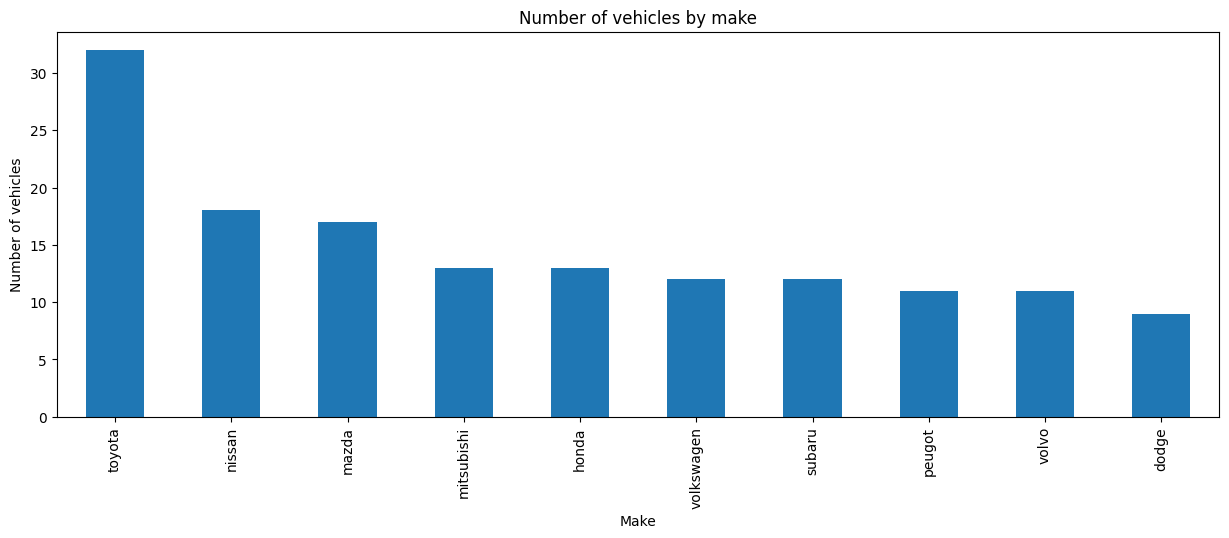

In [122]:
automobile_df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

Text(0.5, 0, 'Risk rating')

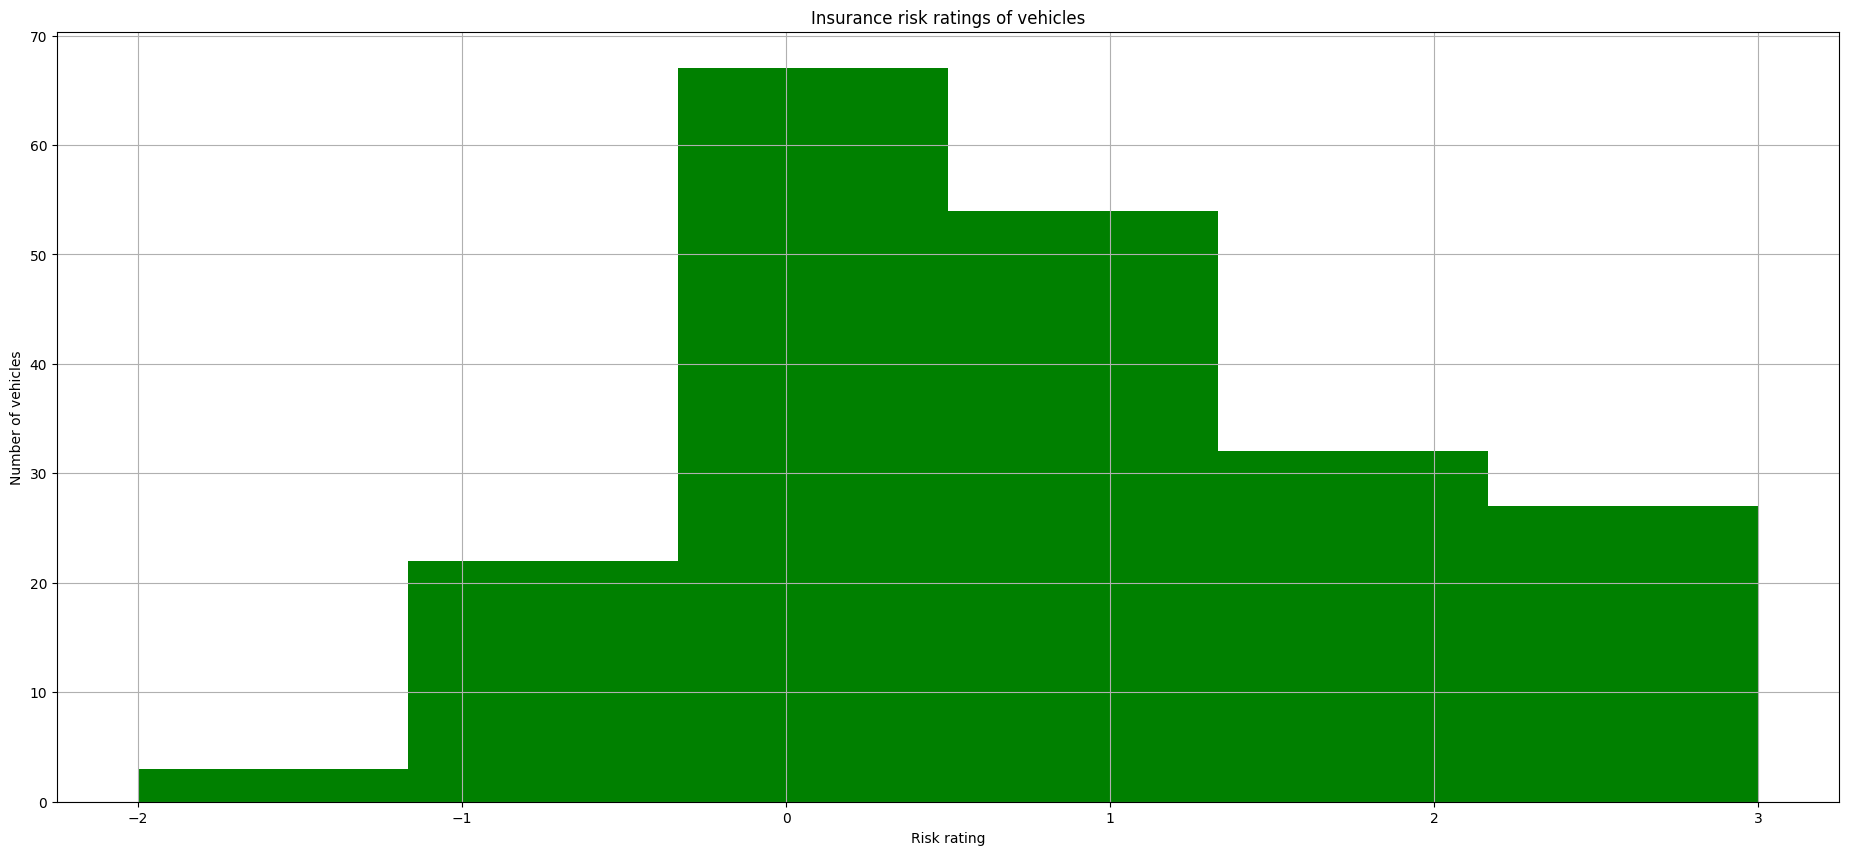

In [123]:
automobile_df.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating')


Text(0.5, 0, 'Fuel type')

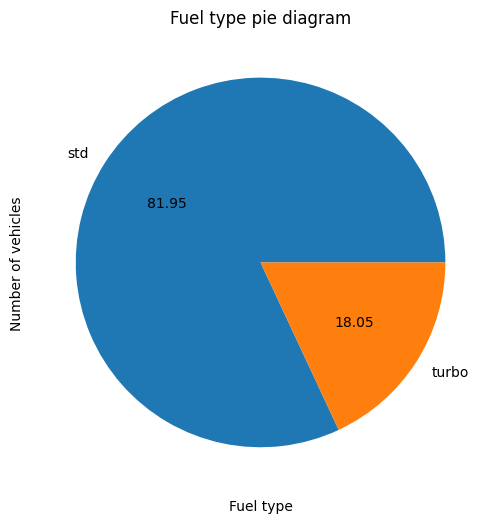

In [124]:
automobile_df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')

/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


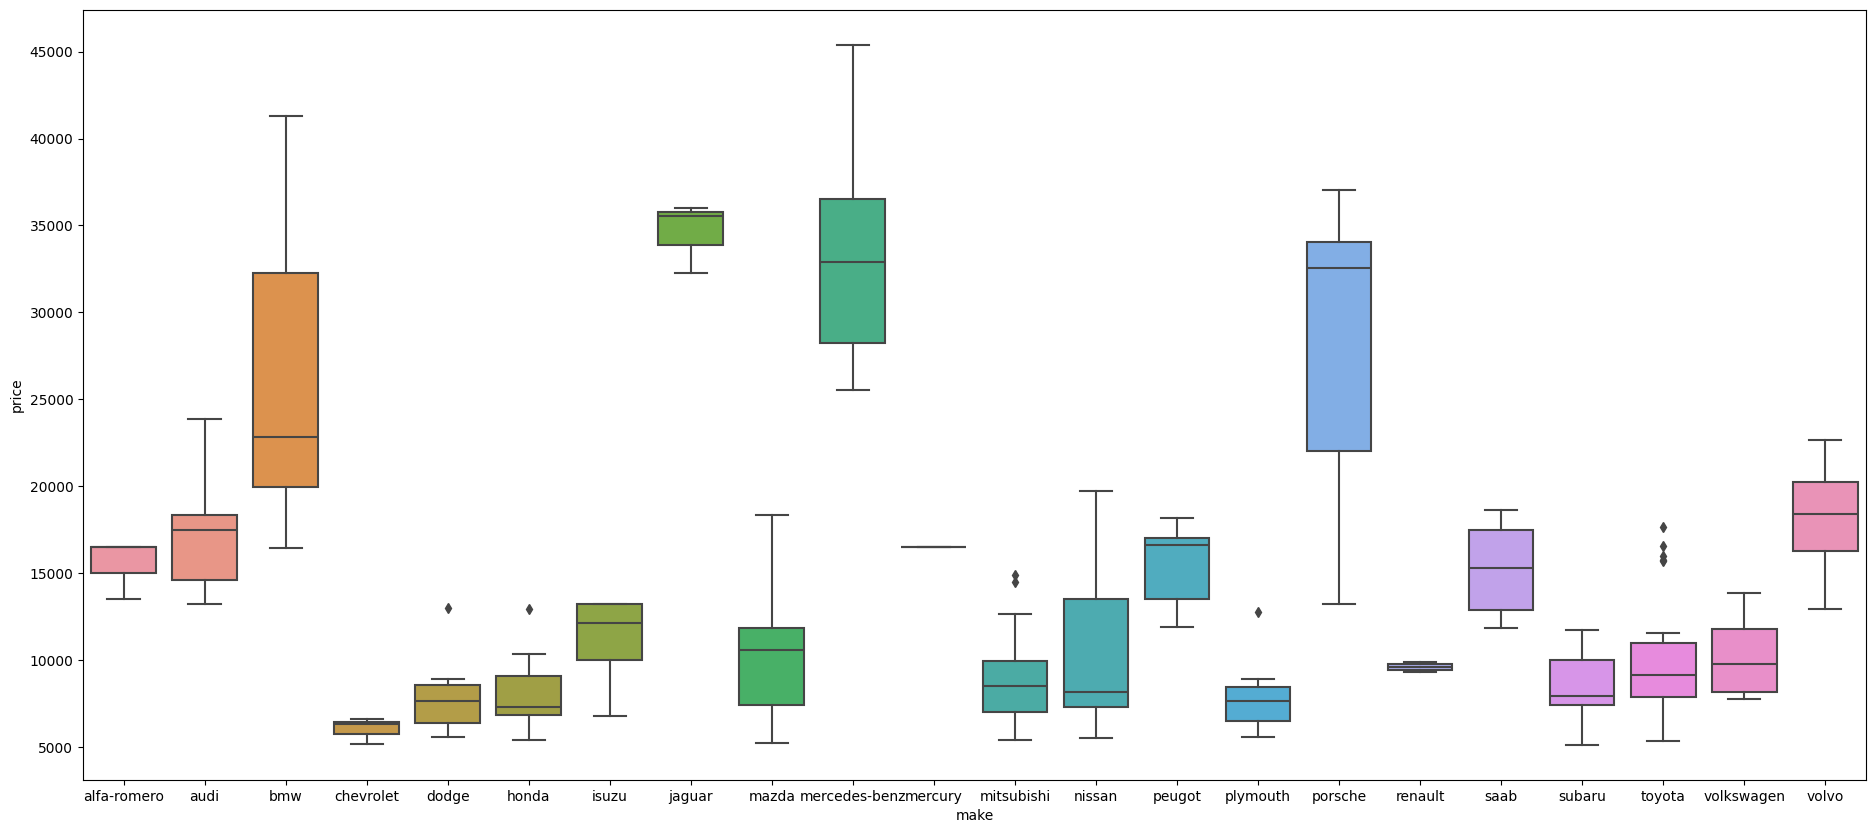

In [125]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=automobile_df)